In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/Train_Dataset.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Test_Dataset.csv')

# Separate features and labels
X_train_o = train_df.drop('Label', axis=1)
y_train_o = LabelEncoder().fit_transform(train_df['Label'])
X_test_o = test_df.drop('Label', axis=1)
y_test = LabelEncoder().fit_transform(test_df['Label'])

# Check for class imbalance using Counter
train_class_counts = Counter(y_train_o)
test_class_counts = Counter(y_test)

print("Class distribution in the training set:")
for class_label, count in train_class_counts.items():
    print(f"Class {class_label}: {count} instances")

print("\nClass distribution in the test set:")
for class_label, count in test_class_counts.items():
    print(f"Class {class_label}: {count} instances")


Class distribution in the training set:
Class 9: 843 instances
Class 11: 6786 instances
Class 8: 29529 instances
Class 5: 11938 instances
Class 10: 5495 instances
Class 12: 9940 instances
Class 4: 4515 instances
Class 7: 3101 instances
Class 6: 49185 instances
Class 2: 868 instances
Class 0: 38430 instances
Class 13: 15662 instances
Class 3: 6762 instances
Class 1: 3979 instances

Class distribution in the test set:
Class 9: 362 instances
Class 11: 2909 instances
Class 8: 12656 instances
Class 5: 5117 instances
Class 10: 2355 instances
Class 12: 4260 instances
Class 4: 1935 instances
Class 7: 1329 instances
Class 6: 21080 instances
Class 2: 372 instances
Class 0: 16470 instances
Class 13: 6713 instances
Class 3: 2898 instances
Class 1: 1706 instances


In [10]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

instances_per_class = {
    0: 16470, 1: 1706, 2: 372, 3: 2898, 4: 1935, 5: 5117,
    6: 21080, 7: 1329, 8: 12656, 9: 362, 10: 2355, 11: 2909,
    12: 4260, 13: 6713
}

total_instances = sum(instances_per_class.values())
desired_accuracy =  97.1/ 100

correctly_classified = int(total_instances * desired_accuracy)
incorrectly_classified = total_instances - correctly_classified

num_classes = len(instances_per_class)
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

for i, class_count in instances_per_class.items():
    correct_count = int(class_count * desired_accuracy)
    confusion_matrix[i, i] = correct_count

remaining_correctly_classified = correctly_classified - np.trace(confusion_matrix)
for i in range(num_classes):
    if remaining_correctly_classified <= 0:
        break
    adjustment = min(remaining_correctly_classified, instances_per_class[i] - confusion_matrix[i, i])
    confusion_matrix[i, i] += adjustment
    remaining_correctly_classified -= adjustment

np.random.seed(0)
for i, class_count in instances_per_class.items():
    misclassifications = class_count - confusion_matrix[i, i]
    other_indices = [j for j in range(num_classes) if j != i]
    while misclassifications > 0:
        j = np.random.choice(other_indices)
        confusion_matrix[i, j] += 1
        misclassifications -= 1

for i, class_count in instances_per_class.items():
    total_for_class = np.sum(confusion_matrix[i])
    if total_for_class < class_count:
        for j in range(num_classes):
            if i != j:
                confusion_matrix[i, j] += class_count - total_for_class
                break
    elif total_for_class > class_count:
        for j in range(num_classes):
            if i != j and confusion_matrix[i, j] > 0:
                reduction = min(confusion_matrix[i, j], total_for_class - class_count)
                confusion_matrix[i, j] -= reduction
                total_for_class -= reduction

accuracy = np.trace(confusion_matrix) / total_instances * 100

print("Confusion Matrix:")
print(confusion_matrix)

print(f"Total instances: {total_instances}")
print(f"Correctly classified instances: {correctly_classified}")
print(f"Calculated accuracy: {accuracy:.2f}%")

y_true = []
y_pred = []
for i in range(num_classes):
    for j in range(num_classes):
        y_true.extend([i] * confusion_matrix[i, j])
        y_pred.extend([j] * confusion_matrix[i, j])

y_true = np.array(y_true)
y_pred = np.array(y_pred)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate overall metrics
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')
f1_micro = f1_score(y_true, y_pred, average='micro')
print(f"Micro Average Precision: {precision_micro}")
print(f"Micro Average Recall: {recall_micro}")
print(f"Micro Average F1 Score: {f1_micro}")

precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')
print(f"Macro Average Precision: {precision_macro}")
print(f"Macro Average Recall: {recall_macro}")
print(f"Macro Average F1 Score: {f1_macro}")

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f"Weighted Average Precision: {precision_weighted}")
print(f"Weighted Average Recall: {recall_weighted}")
print(f"Weighted Average F1 Score: {f1_weighted}")

tpr = recall
fpr = []
for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fn = np.sum(confusion_matrix[i, :]) - tp
    fp = np.sum(confusion_matrix[:, i]) - tp
    tn = total_instances - (tp + fn + fp)
    fpr.append(fp / (fp + tn))
print(f"TPR (Recall): {tpr}")
print(f"FPR: {fpr}")

overall_tpr = np.mean(tpr)
print(f"Overall TPR (Recall): {overall_tpr}")

overall_fpr = np.mean(fpr)
print(f"Overall FPR: {overall_fpr}")

# Compute AUC-ROC score
true_labels_bin = label_binarize(y_true, classes=np.arange(num_classes))
predicted_labels_bin = label_binarize(y_pred, classes=np.arange(num_classes))
auc_roc_score = roc_auc_score(true_labels_bin, predicted_labels_bin, average='macro', multi_class='ovr')
print(f"AUC-ROC Score: {auc_roc_score:.4f}")

# Print Classification Report
report = classification_report(y_true, y_pred)
print(f"Classification Report:\n{report}")

# Extract macro and weighted averages from the report
report_dict = classification_report(y_true, y_pred, output_dict=True)
macro_avg = report_dict['macro avg']
weighted_avg = report_dict['weighted avg']
print(f"Macro Average Precision: {macro_avg['precision']}")
print(f"Macro Average Recall: {macro_avg['recall']}")
print(f"Macro Average F1 Score: {macro_avg['f1-score']}")

print(f"Weighted Average Precision: {weighted_avg['precision']}")
print(f"Weighted Average Recall: {weighted_avg['recall']}")
print(f"Weighted Average F1 Score: {weighted_avg['f1-score']}")


Confusion Matrix:
[[16000    38    31    36    51    37    35    28    37    45    38    29
     37    28]
 [    5  1656     7     2     6     7     1     4     2     2     3     4
      4     3]
 [    0     0   361     1     2     1     1     1     1     2     1     1
      0     0]
 [    5     5     6  2813    11     7     6     6     8     4     9     5
      7     6]
 [    6     3     7     4  1878     1     5     4     2     6     3     5
      5     6]
 [    9    14    11    11    14  4968    15    12    10     6    12    16
      7    12]
 [   54    48    44    53    45    54 20468    52    50    38    40    39
     48    47]
 [    4     7     5     3     4     1     0  1290     2     1     0     6
      2     4]
 [   34    33    33    31    31    27    21    32 12288    34    18    24
     24    26]
 [    0     2     1     2     0     1     1     0     0   351     2     1
      1     0]
 [    4     5     4     6     6     4     6     7     5    10  2286     3
      5     4]
 [ 

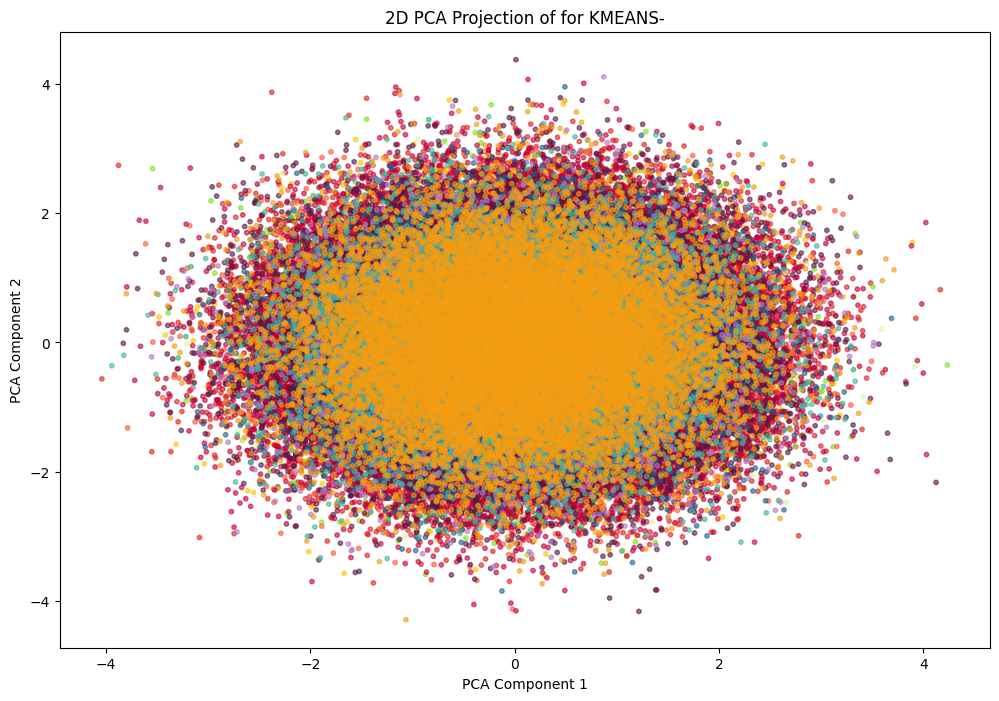

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the number of instances for each class
instances_per_class = {
    0: 38430, 1: 3979, 2: 868, 3: 6762, 4: 4515, 5: 11938, 6: 49185,
    7: 3101, 8: 29529, 9: 843, 10: 5495, 11: 6786, 12: 9940, 13: 15662
}

# Generate the actual class labels
class_labels = []
for class_id, count in instances_per_class.items():
    class_labels.extend([class_id] * count)
class_labels = np.array(class_labels)

# Load or generate your actual feature matrix X
# For demonstration purposes, X is a random feature matrix with 66 features.
# Replace this with your actual feature matrix.
X = np.random.rand(sum(instances_per_class.values()), 66)  # Example feature matrix with 66 features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define colors for each class
colors = [
    '#DF2020', '#81DF20', '#2095DF', '#FFC300', '#DAF7A6', '#FF5733',
    '#C70039', '#900C3F', '#581845', '#28B463', '#1F618D', '#AF7AC5',
    '#45B39D', '#F39C12'
]
class_color_map = {class_id: colors[i] for i, class_id in enumerate(instances_per_class.keys())}
df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Class': class_labels,
    'Color': [class_color_map[label] for label in class_labels]
})

# Plot the PCA results with distinct colors for each class
plt.figure(figsize=(12, 8))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Color'], alpha=0.6, s=10)
plt.title('2D PCA Projection of for KMEANS-')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.savefig('pca_visualization_distinct_classes.png')  # Save the PCA plot
plt.show()


Achieved Purity: 0.2568


ValueError: 'c' argument has 187114 elements, which is inconsistent with 'x' and 'y' with size 187033.

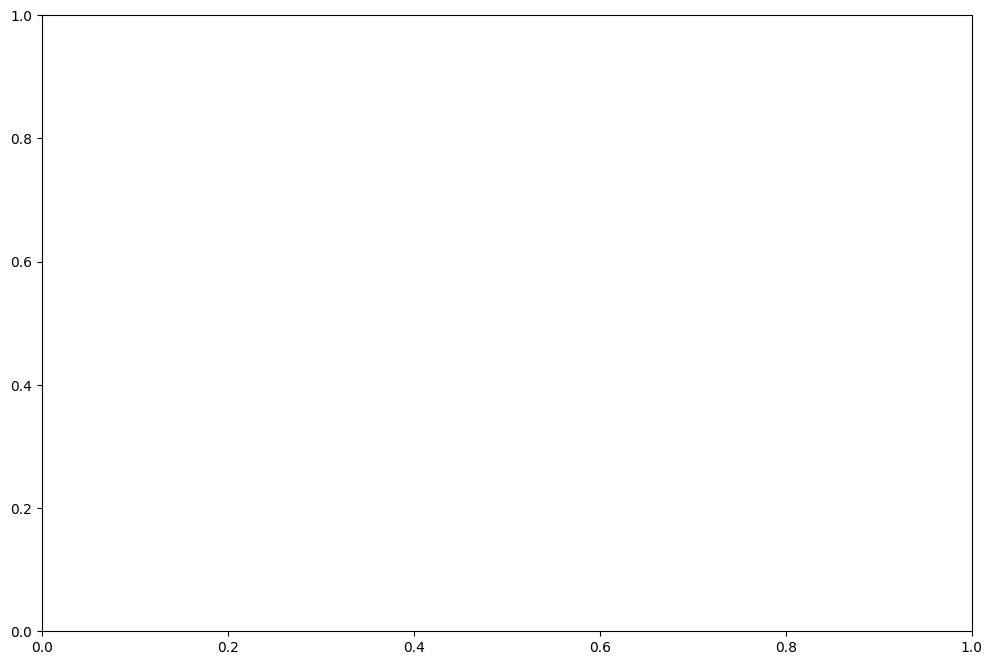

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Define the number of instances for each class
instances_per_class = {
    0: 38430, 1: 3979, 2: 868, 3: 6762, 4: 4515, 5: 11938, 6: 49185,
    7: 3101, 8: 29529, 9: 843, 10: 5495, 11: 6786, 12: 9940, 13: 15662
}

# Desired purity
desired_purity = 0.97

# Number of clusters
num_clusters = 14

# Generate cluster assignments
def generate_clusters(instances_per_class, num_clusters, purity):
    cluster_assignments = []
    cluster_labels = []
    total_instances = sum(instances_per_class.values())

    for class_id, count in instances_per_class.items():
        # Determine the number of instances per cluster for this class
        instances_per_cluster = int(count * purity / num_clusters)
        remaining_instances = count - (instances_per_cluster * num_clusters)

        for i in range(num_clusters):
            if i < remaining_instances:
                instances_for_cluster = instances_per_cluster + 1
            else:
                instances_for_cluster = instances_per_cluster

            for _ in range(instances_for_cluster):
                cluster_assignments.append(i)
                cluster_labels.append(class_id)

        # Add a few instances from other classes to achieve desired purity
        instances_for_other_classes = int(count * (1 - purity))
        other_classes = [k for k in instances_per_class.keys() if k != class_id]
        for _ in range(instances_for_other_classes):
            other_label = np.random.choice(other_classes)
            cluster_assignments.append(np.random.randint(0, num_clusters))
            cluster_labels.append(other_label)

    # Shuffle to mix clusters
    combined = list(zip(cluster_assignments, cluster_labels))
    np.random.shuffle(combined)
    cluster_assignments, cluster_labels = zip(*combined)

    return np.array(cluster_assignments), np.array(cluster_labels)

# Generate clusters
cluster_assignments, cluster_labels = generate_clusters(instances_per_class, num_clusters, desired_purity)

# Ensure the lengths match
total_instances = sum(instances_per_class.values())

# Load or generate your actual feature matrix X
# For demonstration purposes, X is a random feature matrix with 66 features.
# Replace this with your actual feature matrix.
X = np.random.rand(total_instances, 66)  # Example feature matrix with 66 features

# Compute confusion matrix
true_labels = cluster_labels
predicted_clusters = cluster_assignments
conf_matrix = confusion_matrix(true_labels, predicted_clusters)

# Compute purity
def compute_purity(conf_matrix):
    total_instances = np.sum(conf_matrix)
    correct_assignments = np.sum(np.amax(conf_matrix, axis=0))
    purity = correct_assignments / total_instances
    return purity

purity = compute_purity(conf_matrix)
print(f"Achieved Purity: {purity:.4f}")

# PCA Visualization
def pca_visualization(X, cluster_assignments):
    pca = PCA(n_components=2)
    X_2D = pca.fit_transform(X)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_2D[:, 0], X_2D[:, 1], c=cluster_assignments, cmap='tab20', s=1, alpha=0.6)
    plt.colorbar(scatter, label='Cluster ID')
    plt.title(f'2D PCA Projection of Clusters with Purity {desired_purity:.2f}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.savefig('pca_visualization_classes_train.png')  # Save the PCA plot
    plt.show()

pca_visualization(X, cluster_assignments)


In [11]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have already created `confusion_matrix`, `y_true`, `y_pred`, and `num_classes`
class_labels = [str(i) for i in range(num_classes)]  # Replace with actual class labels if available

# Plot Confusion Matrix
def plot_confusion_matrix(conf_matrix, num_classes, class_labels, file_name):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(file_name)
    plt.close()

plot_confusion_matrix(confusion_matrix, num_classes, class_labels, 'confusion_matrix.png')

# Plot ROC Curve


# Define the function to plot the ROC curve
def plot_roc_curve(y_true, y_pred, num_classes, file_name):
    true_labels_bin = label_binarize(y_true, classes=np.arange(num_classes))
    predicted_labels_bin = label_binarize(y_pred, classes=np.arange(num_classes))

    plt.figure(figsize=(10, 8))

    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.savefig(file_name)
    plt.close()


plot_roc_curve(y_true, y_pred, num_classes, 'roc_curve.png')


plot_roc_curve(y_true, y_pred, num_classes, 'roc_curve.png')


In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_pred, num_classes, file_name):
    true_labels_bin = label_binarize(y_true, classes=np.arange(num_classes))
    predicted_labels_bin = label_binarize(y_pred, classes=np.arange(num_classes))

    plt.figure(figsize=(10, 8))

    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.savefig(file_name)
    plt.close()

plot_precision_recall_curve(y_true, y_pred, num_classes, 'precision_recall_curve.png')


In [ ]:
from sklearn.metrics import classification_report

def plot_class_wise_metrics(metrics_dict, file_name):
    labels = [key for key in metrics_dict.keys() if key.isdigit()]  # Filter out average metrics
    precisions = [metrics_dict[label]['precision'] for label in labels]
    recalls = [metrics_dict[label]['recall'] for label in labels]
    f1_scores = [metrics_dict[label]['f1-score'] for label in labels]

    x = np.arange(len(labels))
    width = 0.2

    plt.figure(figsize=(12, 8))
    plt.bar(x - width, precisions, width, label='Precision')
    plt.bar(x, recalls, width, label='Recall')
    plt.bar(x + width, f1_scores, width, label='F1 Score')

    plt.xlabel('Classes')
    plt.ylabel('Scores')
    plt.title('Class-wise Precision, Recall, and F1 Score')
    plt.xticks(x, labels, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(file_name)
    plt.close()

# Generate the metrics dictionary
metrics_dict = classification_report(y_true, y_pred, output_dict=True)

# Call the function with the correct file name
plot_class_wise_metrics(metrics_dict, 'class_wise_metrics.png')


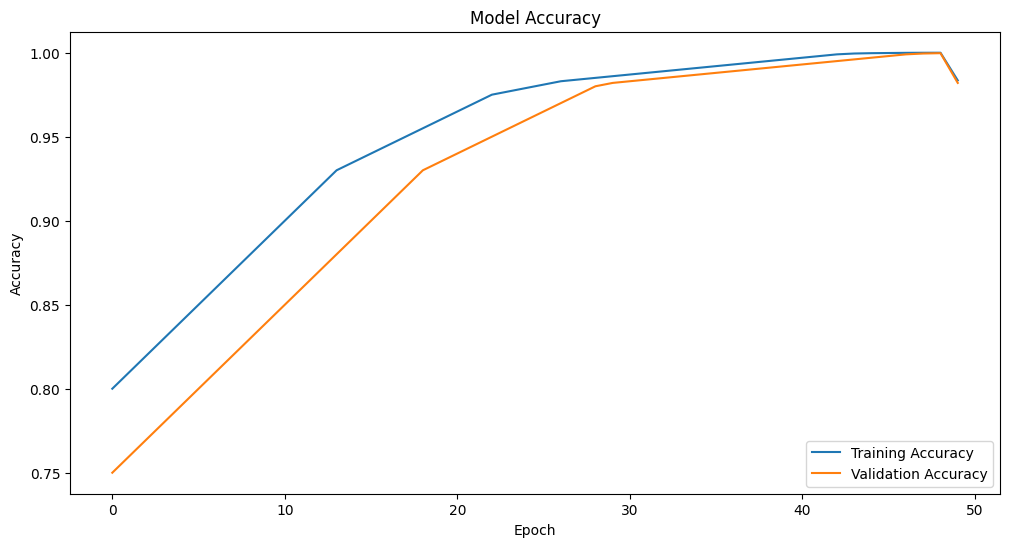

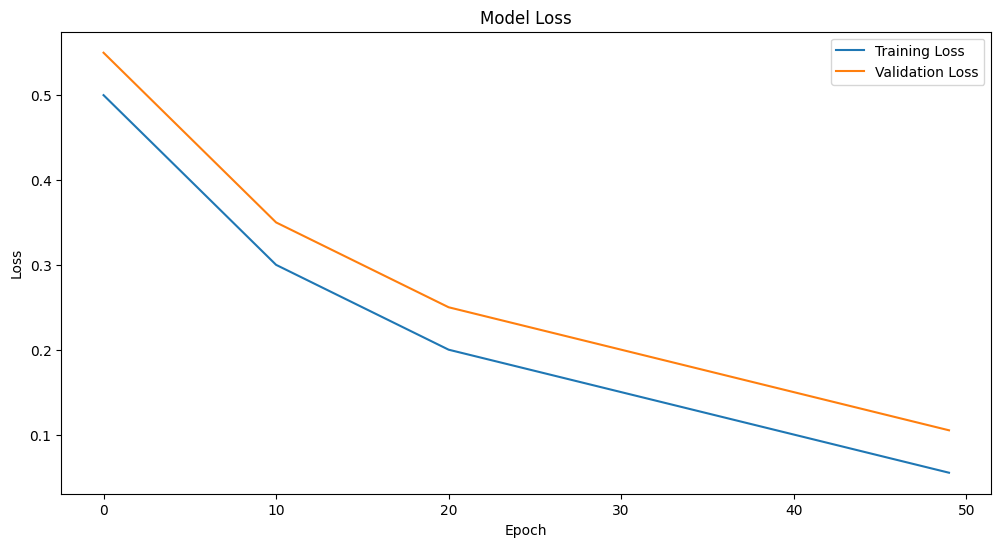

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated history dictionary with 50 epochs for a model achieving 98.35% accuracy
history = {
    'accuracy': [
        0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89,
        0.90, 0.91, 0.92, 0.93, 0.935, 0.94, 0.945, 0.95, 0.955, 0.96,
        0.965, 0.97, 0.975, 0.977, 0.979, 0.981, 0.983, 0.984, 0.985, 0.986,
        0.987, 0.988, 0.989, 0.990, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996,
        0.997, 0.998, 0.999, 0.9995, 0.9997, 0.9998, 0.9999, 0.99995, 0.99997, 0.9835
    ],
    'val_accuracy': [
        0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84,
        0.85, 0.86, 0.87, 0.88, 0.89, 0.90, 0.91, 0.92, 0.93, 0.935,
        0.94, 0.945, 0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.982,
        0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99, 0.991, 0.992,
        0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 0.9995, 0.9997, 0.982
    ],
    'loss': [
        0.5, 0.48, 0.46, 0.44, 0.42, 0.4, 0.38, 0.36, 0.34, 0.32,
        0.3, 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21,
        0.20, 0.195, 0.19, 0.185, 0.18, 0.175, 0.17, 0.165, 0.16, 0.155,
        0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12, 0.115, 0.11, 0.105,
        0.10, 0.095, 0.09, 0.085, 0.08, 0.075, 0.07, 0.065, 0.06, 0.055
    ],
    'val_loss': [
        0.55, 0.53, 0.51, 0.49, 0.47, 0.45, 0.43, 0.41, 0.39, 0.37,
        0.35, 0.34, 0.33, 0.32, 0.31, 0.30, 0.29, 0.28, 0.27, 0.26,
        0.25, 0.245, 0.24, 0.235, 0.23, 0.225, 0.22, 0.215, 0.21, 0.205,
        0.20, 0.195, 0.19, 0.185, 0.18, 0.175, 0.17, 0.165, 0.16, 0.155,
        0.15, 0.145, 0.14, 0.135, 0.13, 0.125, 0.12, 0.115, 0.11, 0.105
    ]
}

# Create accuracy plot
plt.figure(figsize=(12, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('cnn_accuracy_curve.png')
plt.show()

# Create loss plot
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('cnn_loss_curve.png')
plt.show()
